## Stock Prices Anomaly Detection

## Learning Objectives

At the end of the experiment, we will be able to :

* perform PCA based stock analytics
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss

## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.





**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis. 

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

In [1]:
#@title Download dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

### Import required packages

In [2]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv3D, UpSampling2D
from keras.layers import MaxPool2D
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, Model
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PCA Analysis (PART-A)

Principal Component Analysis (PCA) decomposes the data into many vectors called principal components. These summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

Perform PCA based analytics on the stock prices data from different companies.



### Load and pre-process the prices data 

In [3]:
prices = pd.read_csv("prices.csv")

In [4]:
prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,...,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
2,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,...,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
3,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,...,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
4,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,...,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,256.470001,48.305000,132.248978


In [5]:
prices.shape

(394, 503)

In [6]:
prices.isnull().sum()

A       1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
YUM     1
ZBH     1
ZBRA    1
ZION    1
ZTS     1
Length: 503, dtype: int64

In [7]:
prices.fillna(0,inplace=True)

<AxesSubplot:>

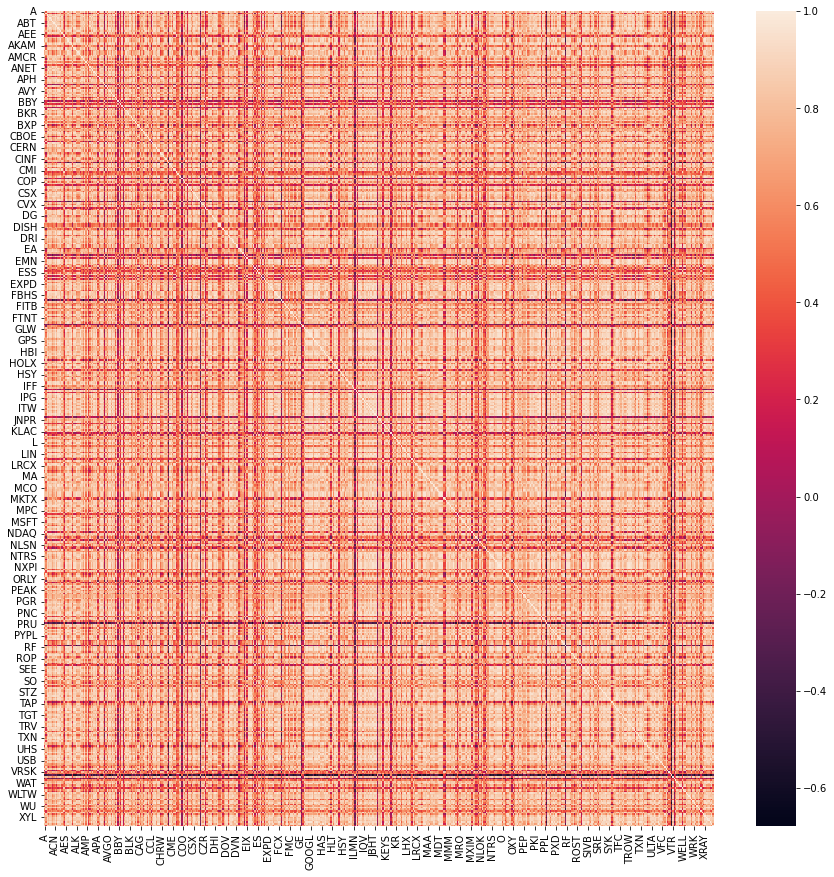

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(prices.corr())

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_prices = scaler.fit_transform(prices)

### Apply PCA 

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks. Hint: See the following 
* Plot the stocks with most negative and least negative PCA weights in the pandemic period (Year 2020). Use reference as above. Discuss the least and most impacted industrial sectors in terms of stocks.

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_prices)

PCA()

In [13]:
table = [prices.columns.values[1:],pca.components_[0]]
pd.DataFrame(pca.components_.T,columns=['component '+str(i+1) for i in range(394)]
             ,index=prices.columns.values)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,component 385,component 386,component 387,component 388,component 389,component 390,component 391,component 392,component 393,component 394
A,-0.050449,-0.035209,0.018544,0.018475,0.008866,-0.024494,0.031576,-0.004663,-0.015303,0.003359,...,0.052451,-0.026979,0.025837,0.001790,-0.167573,-0.036742,0.021838,0.057380,-0.132990,0.045309
AAL,-0.034906,0.088895,0.013078,-0.018247,-0.001843,0.055669,-0.008322,-0.038317,-0.016699,0.026753,...,0.007099,-0.004254,-0.022501,-0.072972,0.070822,-0.013722,-0.060343,-0.044800,0.058051,0.088792
AAP,-0.050622,-0.018164,-0.010602,0.030253,0.010337,0.068455,0.010129,-0.003366,0.028991,-0.037704,...,0.019804,0.000067,-0.073915,0.023897,0.067389,-0.040212,0.142944,0.019772,0.081815,0.167175
AAPL,-0.044606,-0.063214,0.009331,-0.032711,0.008643,0.014679,0.038718,-0.035812,-0.039552,0.035260,...,0.004249,-0.006437,0.057700,-0.035990,-0.056606,-0.025971,-0.000980,0.002140,0.038232,-0.007320
ABBV,-0.049386,-0.024388,-0.002088,0.028291,-0.053349,-0.032529,0.040337,0.038486,0.074950,0.049988,...,0.005980,-0.041487,-0.056114,0.005743,-0.037532,0.000002,0.031721,-0.035489,-0.026128,-0.065150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.052209,0.005807,-0.017150,-0.020432,0.007889,-0.000685,0.026169,0.040376,0.032486,-0.033967,...,-0.067744,-0.049206,0.008604,-0.008085,-0.003960,-0.044373,-0.016923,-0.020010,0.059553,-0.017369
ZBH,-0.050270,0.007984,-0.013596,-0.063155,-0.018128,0.028875,0.004164,-0.015424,0.007035,-0.026795,...,0.022302,0.020237,0.035343,0.092191,-0.030207,0.071076,-0.003487,0.047333,0.013336,-0.073899
ZBRA,-0.049937,-0.021468,0.044269,0.030410,-0.024880,-0.024535,-0.007008,-0.007096,0.018434,-0.014488,...,0.031755,-0.129326,0.022227,-0.051210,-0.031375,-0.130845,-0.106819,0.014529,0.033157,0.123630
ZION,-0.049049,0.035689,0.037435,0.000408,-0.045687,0.004196,-0.026313,0.034664,0.009801,0.022477,...,0.065030,0.040240,0.079299,0.002202,0.029456,-0.059769,-0.028076,0.101580,-0.057496,0.060032


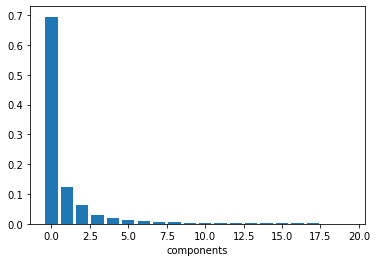

In [14]:
plt.bar(range(len(pca.explained_variance_ratio_[:20])), pca.explained_variance_ratio_[:20])
plt.xlabel('components')
plt.show()

<AxesSubplot:title={'center':'First Principal Component of the S&P500'}>

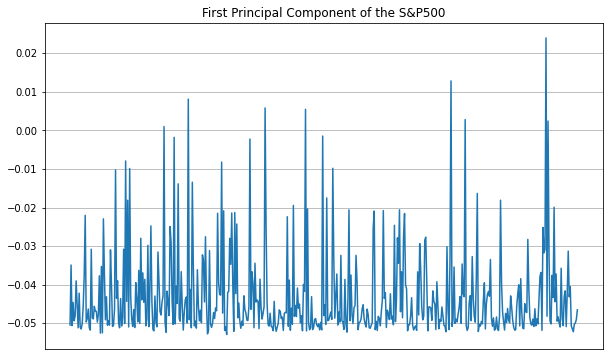

In [15]:
pc1 = pd.Series(index=prices.columns, data=pca.components_[0])
pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')

<AxesSubplot:title={'center':'Stocks with Least Negative PCA Weights'}>

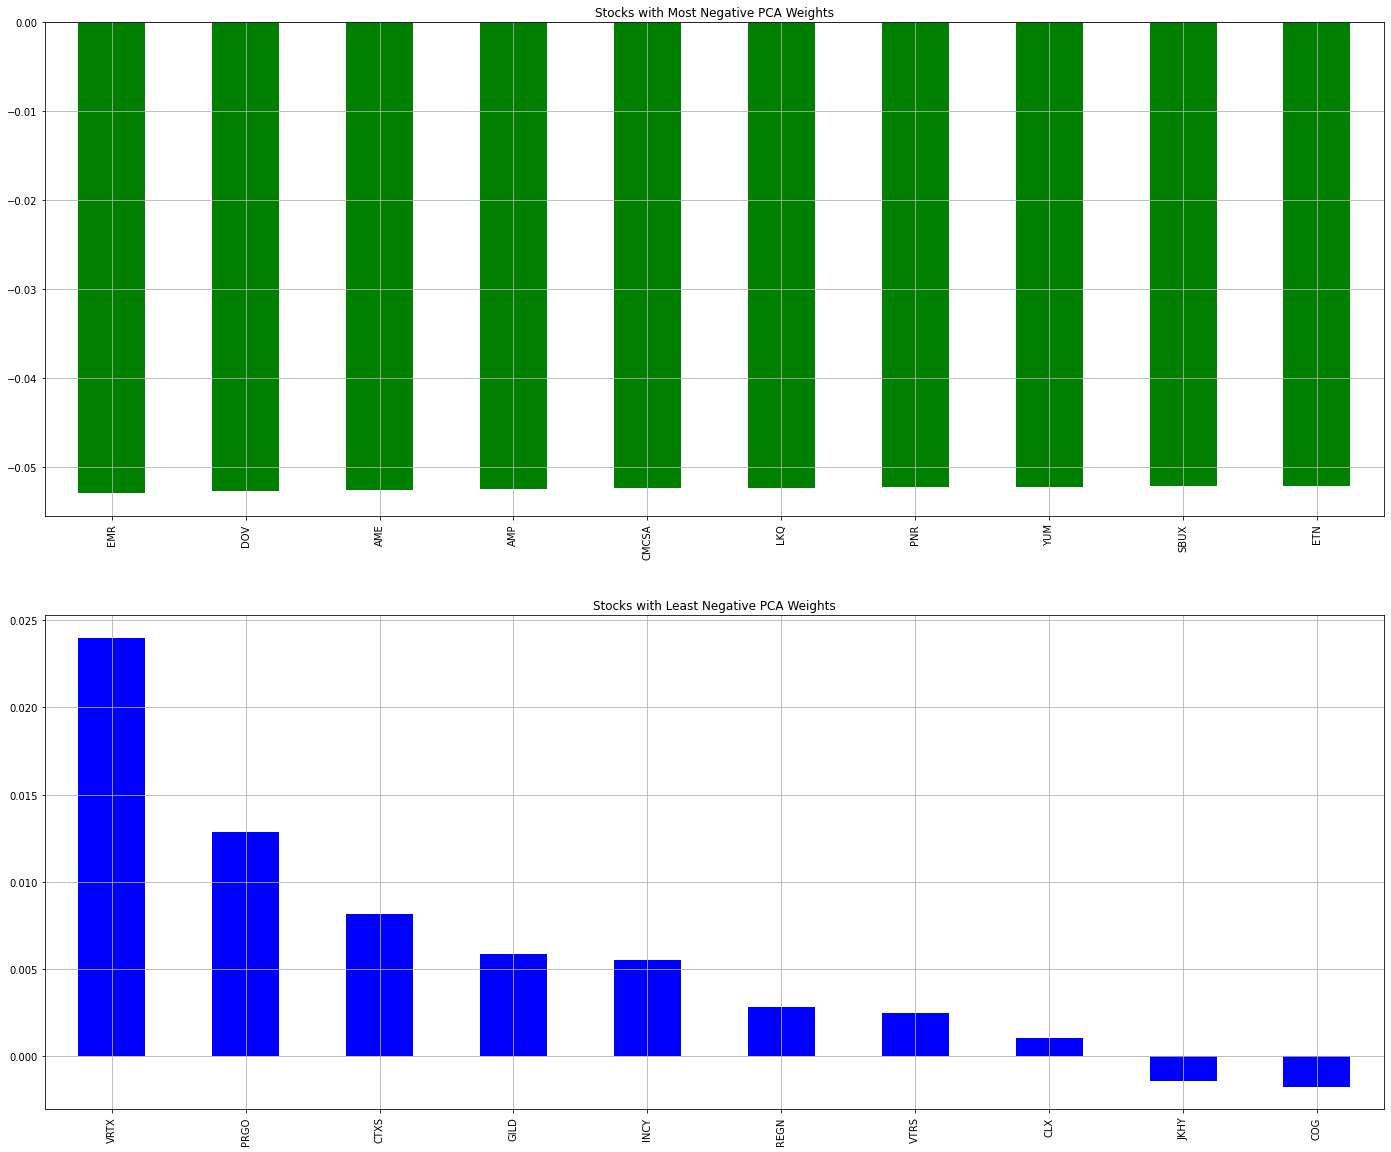

In [16]:
fig, ax = plt.subplots(2,1, figsize=(24,20))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

#### Apply T-SNE and visualize with a graph

(394, 2)


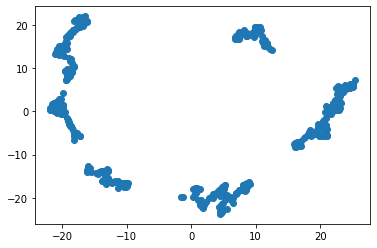

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)
tsne_data = tsne.fit_transform(prices)
print(tsne_data.shape)
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()

## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

In [18]:
path = 'SPY.csv'

In [19]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
1,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
2,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
3,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500
4,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.405315,492100


In [20]:
df.shape

(7134, 7)

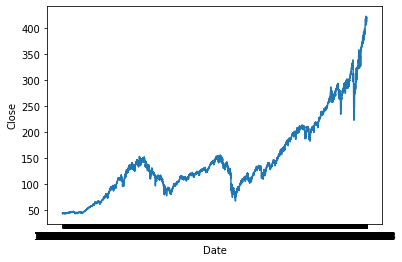

In [22]:
plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

### Data Preprocessing

In [23]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(5707, 7) (1427, 7)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

<ipython-input-24-c271aeabe17a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'] = scaler.transform(train[['Close']])
<ipython-input-24-c271aeabe17a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Close'] = scaler.transform(test[['Close']])


### Create time series data

Select the variable (column) from the data and create the series of data with a window size.



In [25]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values#.reshape(-1)
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [26]:
time_steps = 30

X_train, y_train = create_dataset(train[['Close']], train.Close, time_steps)
X_test, y_test = create_dataset(test[['Close']], test.Close, time_steps)

print(X_train.shape)
print(y_train.shape)

(5677, 30, 1)
(5677,)


### Build an LSTM Autoencoder

Autoencoder should take a sequence as input and outputs a sequence of the same shape.



In [27]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))                 
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [29]:
#Create encoder submodel
encoder = Sequential([Dense(32, activation='relu', input_shape=[30]),
                       Dense(16, activation='relu'),
                       Dense(8, activation='relu')
                       ])

# # Create decoder submodel
decoder = Sequential([Dense(16, activation='relu', input_shape=[8]),
                       Dense(32, activation='relu'),
                       Dense(30, activation='sigmoid')
                       ])

# # Create autoencoder
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mae')

### Train the Autoencoder 

* Compile and fit the model with required parameters

In [30]:
model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    shuffle=False)

Epoch 1/100
160/160 [==============================] - 12s 14ms/step - loss: 0.1775 - val_loss: 0.1603
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1113 - val_loss: 0.3858
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1036 - val_loss: 0.2934
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1049 - val_loss: 0.3557
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0980 - val_loss: 0.3613
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1053 - val_loss: 0.3213
Epoch 7/100
160/160 [==============================] - 2s 11ms/step - loss: 0.1043 - val_loss: 0.2689
Epoch 8/100
160/160 [==============================] - 1s 9ms/step - loss: 0.1214 - val_loss: 0.2129
Epoch 9/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1327 - val_loss: 0.2374
Epoch 10/100
160/160 [==============================] - 1s 8ms/step - loss: 0.1319 - val

### Plot Metrics and Evaluate the Model

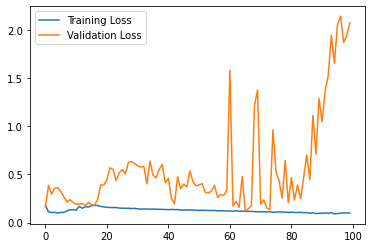

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [32]:
X_train_pred = model.predict(X_train)
train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

178/178 [==============================] - 2s 5ms/step


In [33]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 5.1716


5.171594619750977

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


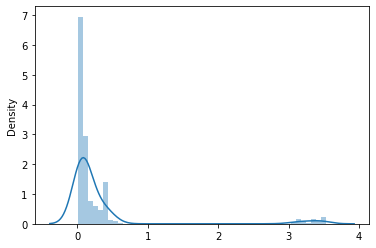

In [34]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [35]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

44/44 [==============================] - 0s 4ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


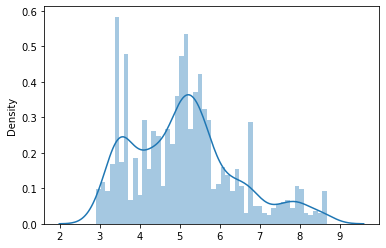

In [36]:
sns.distplot(test_mae_loss, bins=50, kde=True);

### Detect Anomalies in the S&P 500 Index Data 

In [37]:
THRESHOLD = 0.65

test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['Close'] = test[time_steps:].Close

In [38]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,Date,Open,High,Low,Close,Adj Close,Volume,loss,threshold,anomaly
5737,2015-11-10,207.509995,208.600006,207.190002,2.326274,187.012848,75874600,3.321628,0.65,True
5738,2015-11-11,208.880005,208.940002,207.660004,2.305780,186.277618,67846000,3.339303,0.65,True
5739,2015-11-12,206.500000,207.059998,204.820007,2.233300,183.677216,121315200,3.352438,0.65,True
5740,2015-11-13,204.350006,204.669998,202.440002,2.175816,181.614761,153577100,3.362181,0.65,True
5741,2015-11-16,202.320007,205.690002,202.179993,2.252795,184.376602,117645200,3.368335,0.65,True


### Data Preparation

In [39]:
!pip -qq install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.0 MB/s eta 0:00:00


In [40]:
import pandas as pd
import numpy as np
import yfinance as yf

In [41]:
spy_ohlc_df = yf.download('SPY', start='1993-02-01', end='2021-06-01')

[*********************100%***********************]  1 of 1 completed


In [42]:
spy_ohlc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.397594,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.451391,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.720442,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.828060,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.810110,492100


In [43]:
spy_ohlc_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-24,417.339996,420.320007,417.079987,419.170013,408.385468,51376700
2021-05-25,420.329987,420.709991,417.619995,418.239990,407.479431,57451400
2021-05-26,418.869995,419.609985,417.760010,419.070007,408.288025,43088600
2021-05-27,420.170013,420.720001,418.989990,419.290009,408.502411,56707700
2021-05-28,420.970001,421.250000,419.790009,420.040009,409.233154,58520200


In [ ]:
spy_ohlc_df.shape

In [44]:
spy_ohlc_df.reset_index(inplace=True)

In [ ]:
#spy_ohlc_df.to_csv("SPY.csv",index=False)